# Fine Tuning DistilBERT for Multiclass Text Classification

## Model - 'distilbert-base-uncased'


## Dataset Link - https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

## First What is BERT?

BERT stands for Bidirectional Encoder Representations from Transformers. The name itself gives us several clues to what BERT is all about.

BERT architecture consists of several Transformer encoders stacked together. Each Transformer encoder encapsulates two sub-layers: a self-attention layer and a feed-forward layer.

### There are two different BERT models:

- BERT base, which is a BERT model consists of 12 layers of Transformer encoder, 12 attention heads, 768 hidden size, and 110M parameters.

- BERT large, which is a BERT model consists of 24 layers of Transformer encoder,16 attention heads, 1024 hidden size, and 340 parameters.



BERT Input and Output
BERT model expects a sequence of tokens (words) as an input. In each sequence of tokens, there are two special tokens that BERT would expect as an input:

- [CLS]: This is the first token of every sequence, which stands for classification token.
- [SEP]: This is the token that makes BERT know which token belongs to which sequence. This special token is mainly important for a next sentence prediction task or question-answering task. If we only have one sequence, then this token will be appended to the end of the sequence.


It is also important to note that the maximum size of tokens that can be fed into BERT model is 512. If the tokens in a sequence are less than 512, we can use padding to fill the unused token slots with [PAD] token. If the tokens in a sequence are longer than 512, then we need to do a truncation.

And that’s all that BERT expects as input.

BERT model then will output an embedding vector of size 768 in each of the tokens. We can use these vectors as an input for different kinds of NLP applications, whether it is text classification, next sentence prediction, Named-Entity-Recognition (NER), or question-answering.


------------

**For a text classification task**, we focus our attention on the embedding vector output from the special [CLS] token. This means that we’re going to use the embedding vector of size 768 from [CLS] token as an input for our classifier, which then will output a vector of size the number of classes in our classification task.

-----------------------

![Imgur](https://imgur.com/NpeB9vb.png)

-------------------------

In [8]:
!python.exe -m pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2


In [43]:
!pip install --upgrade seaborn pandas

   -------------------------------------- 294.9/294.9 kB 587.0 kB/s eta 0:00:00
   ---------------------------------------- 11.6/11.6 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.2.0 which is incompatible.


In [9]:
!pip install pandas

In [10]:
!pip  install transformers

In [11]:
import transformers

In [12]:
print(transformers.__version__)

4.22.1


In [13]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import re
import nltk

In [21]:
import seaborn as sns

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\40104197\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
root_path = 'bbc-text.csv'

In [16]:
df = pd.read_csv(root_path)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [17]:
df.shape

(2225, 2)

# Histogram of the count of text

In [18]:
df['count'] = df['text'].apply(lambda x: len(x.split()))

In [84]:
df.head(10)

,category,text,count,encoded_text
0,tech,tv future in the hands of viewers with home th...,737,4
1,business,worldcom boss left books alone former worldc...,300,0
2,sport,tigers wary of farrell gamble leicester say ...,246,3
3,sport,yeading face newcastle in fa cup premiership s...,341,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1
5,politics,howard hits back at mongrel jibe michael howar...,633,2
6,politics,blair prepares to name poll date tony blair is...,269,2
7,sport,henman hopes ended in dubai third seed tim hen...,191,3
8,sport,wilkinson fit to face edinburgh england captai...,157,3
9,entertainment,last star wars not for children the sixth an...,237,1


In [27]:
import numpy as np

In [36]:
df['count'].to_csv('test.csv')

<AxesSubplot:ylabel='Density'>

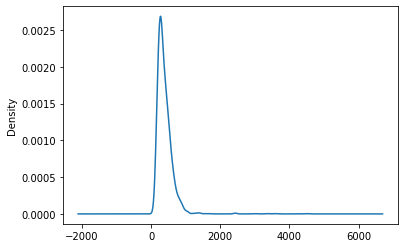

In [38]:
df['count'].plot(kind='kde')

In [44]:
# import plotly.express as px
# data = df['count']
# fig = px.histogram(df['count'], nbins=len(data), histnorm='probability density', title='Distribution Plot')

# # Show the plot
# fig.show()

In [46]:
# plt.figure(figsize= (8, 8))

# sns.displot(df['count'].fillna(0))

# # plt.xlim(0, 1000)

# # plt.xlabel('The num of words ', fontsize = 16)
# # plt.title("The Number of Words Distribution", fontsize = 18)
# # plt.show()

# Bar plot for each of the new category

In [47]:
category_count = df['category'].value_counts()

categories = category_count.index

categories

Index(['sport', 'business', 'politics', 'tech', 'entertainment'], dtype='object', name='category')

In [48]:
category_count

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [49]:
category_count.index

Index(['sport', 'business', 'politics', 'tech', 'entertainment'], dtype='object', name='category')

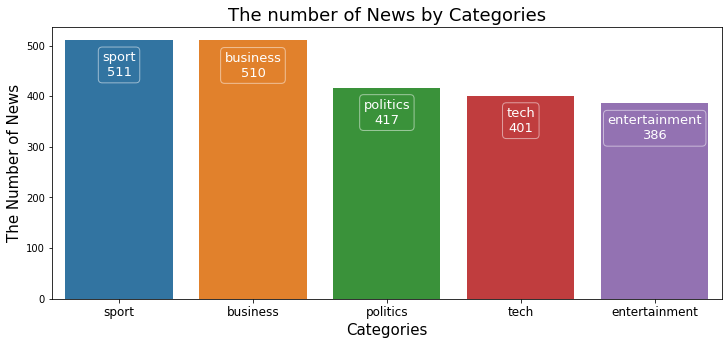

In [50]:
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
    
plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of News', size= 15)

plt.xticks(size = 12)

plt.title("The number of News by Categories" , size = 18)

plt.show()

In [51]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [56]:
df['encoded_text'] = df['category'].astype('category').cat.codes

df.head(10)

,category,text,count,encoded_text
0,tech,tv future in the hands of viewers with home th...,737,4
1,business,worldcom boss left books alone former worldc...,300,0
2,sport,tigers wary of farrell gamble leicester say ...,246,3
3,sport,yeading face newcastle in fa cup premiership s...,341,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1
5,politics,howard hits back at mongrel jibe michael howar...,633,2
6,politics,blair prepares to name poll date tony blair is...,269,2
7,sport,henman hopes ended in dubai third seed tim hen...,191,3
8,sport,wilkinson fit to face edinburgh england captai...,157,3
9,entertainment,last star wars not for children the sixth an...,237,1


In [58]:
# df['text'].to_list()

In [59]:
data_texts = df['text'].to_list()

data_labels = df['encoded_text'].to_list()

# Train Test SPlit

In [60]:
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 0 )


train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size = 0.01, random_state = 0 )



# Model Definition

In [108]:
from transformers import DistilBertTokenizer, DistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [64]:
from transformers import DistilBertTokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [69]:
for key,item in train_encodings.items():
    print(key)

input_ids
attention_mask


In [99]:
from transformers import DistilBertModel, DistilBertConfig

# Load DistilBERT model
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [102]:
import tensorflow as tf
from transformers import TFDistilBertModel, DistilBertConfig

# Load DistilBERT model
config = DistilBertConfig.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

# Create a dummy input
input_ids = tf.keras.Input(shape=(128,), dtype='int32')

# Call the model on the input
outputs = model(input_ids)

# Create a TensorFlow graph model
graph_model = tf.keras.Model(inputs=input_ids, outputs=outputs)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [104]:
!pip install pydot

In [105]:
tf.keras.utils.plot_model(graph_model, to_file='distilbert_graph.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [106]:
import tensorflow as tf
from transformers import TFDistilBertModel, DistilBertConfig

# Load DistilBERT model
config = DistilBertConfig.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

# Create a summary writer
writer = tf.summary.create_file_writer("logs")

# Define a function to extract weights and biases
def extract_weights_and_biases(model):
    weights_and_biases = {}
    for layer in model.layers:
        if hasattr(layer, 'get_weights'):
            weights, biases = layer.get_weights()
            weights_and_biases[layer.name + '_weights'] = weights
            weights_and_biases[layer.name + '_biases'] = biases
    return weights_and_biases

# Dummy input
input_ids = tf.keras.Input(shape=(128,), dtype='int32')

# Call the model on the input
outputs = model(input_ids)

# Create a TensorFlow graph model
graph_model = tf.keras.Model(inputs=input_ids, outputs=outputs)

# Extract weights and biases
weights_and_biases = extract_weights_and_biases(graph_model)

# Write weights and biases to TensorBoard
with writer.as_default():
    for name, value in weights_and_biases.items():
        tf.summary.histogram(name, value, step=0)

# Close the writer
writer.close()


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


ValueError: not enough values to unpack (expected 2, got 0)

In [83]:
train_encodings['attention_mask'][4]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [92]:
sum(train_encodings['attention_mask'][4])

446

In [82]:
count = 0
for i in train_encodings['input_ids'][4]:
    if i!=0:
        count = count+1

print(count)

446


In [86]:
train_encodings['input_ids'][4]

[101,
 16509,
 3415,
 6332,
 2000,
 1043,
 15006,
 2078,
 16509,
 2038,
 2315,
 1037,
 6480,
 7904,
 2000,
 2448,
 2049,
 3136,
 2044,
 5828,
 1043,
 15006,
 2078,
 2049,
 3811,
 3144,
 5795,
 3138,
 3715,
 2012,
 14605,
 1012,
 2004,
 2708,
 4082,
 2961,
 2000,
 6182,
 19663,
 11895,
 3654,
 2097,
 2448,
 16509,
 2006,
 1037,
 3679,
 3978,
 2348,
 2720,
 1043,
 15006,
 2078,
 2040,
 3040,
 23356,
 2098,
 2049,
 7233,
 2097,
 3961,
 2708,
 3237,
 1012,
 2720,
 1043,
 15006,
 2078,
 2003,
 2000,
 2468,
 3472,
 1998,
 2708,
 3237,
 1997,
 14605,
 2029,
 8617,
 4008,
 1003,
 1997,
 1996,
 2887,
 2482,
 8571,
 1999,
 2258,
 1012,
 2720,
 1043,
 15006,
 2078,
 8590,
 16509,
 2046,
 1037,
 3435,
 1011,
 3652,
 1998,
 15282,
 2449,
 1012,
 2720,
 11895,
 3654,
 2097,
 24207,
 3710,
 2004,
 2720,
 1043,
 15006,
 2078,
 1055,
 4112,
 1012,
 2174,
 2002,
 2097,
 2022,
 16509,
 1055,
 2087,
 3026,
 2900,
 1011,
 2241,
 3237,
 1998,
 2097,
 2022,
 1999,
 3715,
 1997,
 1996,
 3813,
 1055,
 3795,
 4

In [110]:
tokenizer(['I love apple its good for health','Apple is dominating the word by Launching Iphone'], truncation = True, padding = True  )

{'input_ids': [[101, 1045, 2293, 6207, 2049, 2204, 2005, 2740, 102, 0], [101, 6207, 2003, 21949, 1996, 2773, 2011, 12106, 18059, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [117]:
vocab_list = tokenizer.get_vocab()

In [119]:
dict_new = {}

In [120]:
for key,items in vocab_list.items():
    dict_new[items] = key

In [122]:
lst_new = []

In [128]:
len(vocab_list)

30522

In [124]:
for key,value in dict_new.items():
    if key in [101, 1045, 2293, 6207, 2049, 2204, 2005, 2740, 102, 0]:
        lst_new.append((key,dict_new[key]))

In [125]:
lst_new

[(0, '[PAD]'),
 (101, '[CLS]'),
 (102, '[SEP]'),
 (1045, 'i'),
 (2005, 'for'),
 (2049, 'its'),
 (2204, 'good'),
 (2293, 'love'),
 (2740, 'health'),
 (6207, 'apple')]

In [126]:
lst_new = []
for key,value in dict_new.items():
    if key in [101, 6207, 2003, 21949, 1996, 2773, 2011, 12106, 18059, 102]:
        lst_new.append((key,dict_new[key]))

In [127]:
lst_new

[(101, '[CLS]'),
 (102, '[SEP]'),
 (1996, 'the'),
 (2003, 'is'),
 (2011, 'by'),
 (2773, 'word'),
 (6207, 'apple'),
 (12106, 'launching'),
 (18059, 'iphone'),
 (21949, 'dominating')]

In [116]:
vocab_list = list(vocab_list.keys())
vocab_list

['[PAD]',
 '[unused0]',
 '[unused1]',
 '[unused2]',
 '[unused3]',
 '[unused4]',
 '[unused5]',
 '[unused6]',
 '[unused7]',
 '[unused8]',
 '[unused9]',
 '[unused10]',
 '[unused11]',
 '[unused12]',
 '[unused13]',
 '[unused14]',
 '[unused15]',
 '[unused16]',
 '[unused17]',
 '[unused18]',
 '[unused19]',
 '[unused20]',
 '[unused21]',
 '[unused22]',
 '[unused23]',
 '[unused24]',
 '[unused25]',
 '[unused26]',
 '[unused27]',
 '[unused28]',
 '[unused29]',
 '[unused30]',
 '[unused31]',
 '[unused32]',
 '[unused33]',
 '[unused34]',
 '[unused35]',
 '[unused36]',
 '[unused37]',
 '[unused38]',
 '[unused39]',
 '[unused40]',
 '[unused41]',
 '[unused42]',
 '[unused43]',
 '[unused44]',
 '[unused45]',
 '[unused46]',
 '[unused47]',
 '[unused48]',
 '[unused49]',
 '[unused50]',
 '[unused51]',
 '[unused52]',
 '[unused53]',
 '[unused54]',
 '[unused55]',
 '[unused56]',
 '[unused57]',
 '[unused58]',
 '[unused59]',
 '[unused60]',
 '[unused61]',
 '[unused62]',
 '[unused63]',
 '[unused64]',
 '[unused65]',
 '[unused6

In [133]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel

In [156]:
input_ids = torch.tensor([[101, 6207, 2003, 21949, 1996, 2773, 2011, 12106, 18059, 102]])

In [135]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [157]:
with torch.no_grad():
    outputs = model(input_ids)

In [158]:
embeddings = outputs[0]

In [159]:
print(embeddings.shape)

torch.Size([1, 10, 768])


In [160]:
df_1 = pd.DataFrame(embeddings[0])
df_1

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.064195,-0.132760,0.063612,-0.240925,-0.083574,-0.134110,0.183394,0.636293,-0.207520,-0.309251,...,0.066120,0.064992,0.166451,0.129627,0.382242,-0.049030,0.070702,-0.305815,0.402528,0.275772
1,0.220875,0.536741,0.062352,-0.366541,0.962489,0.159533,0.142841,0.594624,0.065557,-0.220243,...,-0.327927,-0.237269,0.202416,0.080851,0.609687,0.311438,0.066710,-0.261410,0.278812,-0.386621
2,-0.165870,-0.147410,0.026216,-0.123433,0.208637,-0.286534,-0.077499,1.027212,-0.271760,-0.336569,...,0.228105,-0.242532,0.012316,0.193832,0.203882,0.195478,0.152664,-0.380540,0.382057,0.248115
3,0.171084,-0.123699,0.054632,-0.128233,-0.145563,0.028687,0.031279,0.706398,-0.430838,-0.281623,...,-0.102147,0.348230,0.138830,-0.017375,0.091121,0.054534,0.321404,-0.297334,0.050124,-0.073259
4,0.222836,-0.070597,0.223148,0.135712,-0.075137,0.105200,0.270980,1.035562,-0.531304,-0.333751,...,0.255538,0.589822,0.187245,-0.139378,0.406396,-0.099877,-0.093794,-0.184244,0.451584,0.220263
5,0.179680,-0.130723,0.388627,-0.103329,-0.075229,0.287989,0.413951,1.124503,-0.075223,-0.226912,...,0.062560,0.416276,0.420572,-0.114803,0.497528,0.034608,0.147104,-0.397269,0.220228,0.082987
6,0.022870,-0.153145,0.301243,-0.380410,-0.058848,-0.448745,-0.062261,0.835166,-0.349961,-0.497509,...,0.089242,0.092704,-0.280267,0.343526,0.082598,0.034074,-0.032630,-0.426993,0.360913,0.514137
7,-0.058128,0.148258,0.203097,-0.261881,0.211331,-0.327688,-0.082414,0.771493,-0.206124,-0.089921,...,-0.081577,0.188636,-0.102073,0.241130,0.485556,-0.087771,0.254292,-0.464162,0.491040,-0.173747
8,-0.195728,0.179158,0.149608,-0.369451,0.789648,0.279344,-0.065213,0.526035,-0.050126,-0.443934,...,0.065183,-0.000770,-0.128338,-0.035017,0.583454,0.185133,0.262193,-0.176383,0.069893,-0.561593
9,0.767364,0.404493,-0.399893,0.322853,-0.500069,-0.933793,0.491240,-0.326429,0.551198,0.081350,...,0.032090,0.111364,-0.357744,-0.665155,0.461960,-1.010690,-0.164280,-0.249979,-0.460849,-0.531588


In [155]:
df_1 = pd.DataFrame(embeddings[0])
df_1

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.056091,0.127475,0.056981,-0.148942,-0.040867,0.033770,0.171286,0.548885,-0.201742,-0.213859,...,-0.002993,-0.205541,-0.012523,0.082158,0.326329,-0.072332,-0.082064,-0.032882,0.219267,0.308177
1,0.388158,0.393668,0.208844,-0.278210,0.337384,0.406747,0.074446,1.157242,0.051203,-0.038894,...,0.616548,-0.129436,0.274405,-0.054965,0.153705,-0.019826,-0.099569,-0.028225,0.482723,0.426559
2,0.905401,0.705414,0.704874,0.045916,0.303495,0.122623,-0.097725,0.961187,-0.148644,-0.152075,...,0.142680,-0.051404,0.089684,0.158385,0.107652,0.149618,-0.112709,-0.148615,0.242422,0.218383
3,0.065937,0.251994,-0.061540,0.082982,0.716709,0.245081,-0.027020,0.797194,-0.059649,-0.090892,...,-0.369977,-0.089909,0.046603,0.160863,0.310937,0.184556,0.321837,0.152796,-0.160329,-0.388230
4,-0.124857,0.291590,0.325362,0.048759,0.028038,0.116337,0.241820,1.246581,-0.061237,-0.396730,...,-0.037526,-0.076632,0.182639,0.316800,-0.147912,-0.252124,0.332141,0.135236,-0.096692,0.606513
5,-0.046862,0.306907,0.426648,-0.038459,0.431170,0.022300,0.171610,0.937630,-0.199760,-0.227127,...,-0.245337,-0.207044,-0.069029,0.282795,0.022712,-0.071365,-0.044824,-0.075301,-0.041037,-0.442021
6,0.391529,0.097367,0.374286,0.176169,0.195926,0.256752,0.042226,0.846141,-0.379775,-0.527885,...,-0.044587,-0.262445,0.098442,0.229352,0.172118,-0.099624,-0.245188,0.074528,0.212070,-0.181547
7,0.149265,-0.153312,0.042436,0.072645,0.443485,0.152356,0.034776,1.067249,-0.456926,-0.354284,...,0.193140,-0.259188,0.159221,0.124030,0.466674,-0.151697,0.202071,0.132119,0.038344,-0.406034
8,0.953832,0.421346,-0.377084,0.530712,-0.459511,-0.722913,0.210109,-0.135080,0.517462,0.128379,...,-0.103504,0.085531,-0.348118,-0.659088,0.258466,-0.688506,0.116538,0.174492,-0.563591,-0.330741
9,0.145254,0.011127,0.069890,0.164813,0.182884,0.187455,0.032175,0.383692,0.045073,-0.316191,...,-0.092373,-0.090855,-0.233686,0.122942,0.048451,-0.159634,0.078881,0.169858,-0.008573,0.105760


In [150]:
embeddings[0]

tensor([[-0.0561,  0.1275,  0.0570,  ..., -0.0329,  0.2193,  0.3082],
        [ 0.3882,  0.3937,  0.2088,  ..., -0.0282,  0.4827,  0.4266],
        [ 0.9054,  0.7054,  0.7049,  ..., -0.1486,  0.2424,  0.2184],
        ...,
        [ 0.1493, -0.1533,  0.0424,  ...,  0.1321,  0.0383, -0.4060],
        [ 0.9538,  0.4213, -0.3771,  ...,  0.1745, -0.5636, -0.3307],
        [ 0.1453,  0.0111,  0.0699,  ...,  0.1699, -0.0086,  0.1058]])

In [89]:
len(train_texts[4].split())

366

In [ ]:
tokenizer(train_texts, truncation = True, padding = True  )

In [107]:
train_texts[4]

'nissan names successor to ghosn nissan has named a lifetime employee to run its operations after carlos ghosn  its highly successful boss  takes charge at renault.  as chief operating officer  toshiyuki shiga will run nissan on a daily basis  although mr ghosn  who masterminded its recovery  will remain chief executive. mr ghosn is to become chairman and chief executive of renault  which owns 44% of the japanese carmaker  in april. mr ghosn transformed nissan into a fast-growing and profitable business.  mr shiga will nominally serve as mr ghosn s deputy. however  he will be nissan s most senior japan-based executive and will be in charge of the firm s global sales and marketing.  he is currently in charge of nissan s operations across asia and australasia and is credited with significantly improving its sales in china. he will inherit a strong legacy from mr ghosn  who has overseen a dramatic turnaround in nissan s fortunes in the past five years. dubbed  le cost killer  for pushing 

In [68]:

train_encodings = tokenizer(train_texts, truncation = True, padding = True  )

val_encodings = tokenizer(val_texts, truncation = True, padding = True )

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))


val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

# Fine-tuning with the TFTrainer class

In [90]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)

tf_model.h5:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments


training_args = TFTrainingArguments(
    output_dir='./results',          
    num_train_epochs=7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=64,   
    warmup_steps=500,                
    weight_decay=1e-5,               
    logging_dir='./logs',            
    eval_steps=100                   
)

with training_args.strategy.scope():
    trainer_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 5 )


trainer = TFTrainer(
    model=trainer_model,                 
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
)

In [ ]:
trainer.train()

In [ ]:
trainer.evaluate()

# Saving & Loading the model

In [ ]:
save_directory = "/saved_models" 

model.save_pretrained(save_directory)

toknizer.save_pretrained(save_directory)

# Loading Pre-Trained Model

In [ ]:
tokenizer_fine_tuned = DistilBertTokenizer.from_pretrained(save_directory)

model_fine_tuned = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

In [54]:
test_text = test_texts[0]

test_text

'dollar hovers around record lows the us dollar hovered close to record lows against the euro on friday as concern grows about the size of the us budget deficit.  analysts predict that the dollar will remain weak in 2005 as investors worry about the state of the us economy. the bush administration s apparent unwillingness to intervene to support the dollar has caused further concern. however  trading has been volatile over the past week because of technical and automated trading and light demand. this has amplified reactions to news  analysts said  adding that they expect markets to become less jumpy in january.  the dollar was trading at $1.3652 versus the euro on friday morning after hitting a fresh record low of $1.3667 on thursday. one dollar bought 102.55 yen.  disappointing business figures from chicago triggered the us currency s weakness on thursday. the national association of purchasing management-chicago said its manufacturing index dropped to 61.2  a bigger fall than expect

In [ ]:
predict_input = tokenizer_fine_tuned.encode(
    test_text,
    truncation = True,
    padding = True,
    return_tensors = 'tf'    
)

output = model_fine_tuned(predict_input)[0]

prediction_value = tf.argmax(output, axis = 1).numpy()[0]

prediction_value

# Inferencing with Pytorch

In [ ]:
import torch

from transformers import DistilBertForSequenceClassification

tokenizer_fine_tuned_pt = DistilBertTokenizer.from_pretrained(save_directory)


model_fine_tuned_pt = DistilBertForSequenceClassification.from_pretrained(save_directory, from_tf = True )


In [ ]:
predict_input_pt = tokenizer_fine_tuned_pt(test_text, truncation = True, padding = True, return_tensors = 'pt' )

ouput_pt = model_fine_tuned_pt(predict_input_pt)

prediction_value_pt = torch.argmax(ouput_pt[0], dim = 1 ).item()

prediction_value_pt